## Global Human Trafficking Data Analysis 

This data analysis was done using the dataset from Kaggle (https://www.kaggle.com/andrewmvd/global-human-trafficking). This dataset is taken from the Counter-Trafficking Data Collaborative (CTDC). This dataset contains information on 48.8k victims of human trafficking, including the reason, means of control, origin and destination, as well as other variables. Missingness is displayed as -99 in this dataset.

The objective of this dataset : 
1. Predict time series of human trafficking.
2. Explore demographics, means of control and other variables associated with human trafficking.

Some great resources I used to build my code:
1. https://www.kaggle.com/jeffreybraun/human-trafficking-starter-analysis
2. https://www.kaggle.com/viktorpolevoi/global-human-trafficking-eda

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
from pycountry_convert import country_alpha2_to_country_name, country_name_to_country_alpha3
import os
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("human_trafficking.csv")
data.head()

,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,...,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
1,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
2,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
3,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
4,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1


In [3]:
data.columns

Index(['yearOfRegistration', 'Datasource', 'gender', 'ageBroad',
       'majorityStatus', 'majorityStatusAtExploit', 'majorityEntry',
       'citizenship', 'meansOfControlDebtBondage',
       'meansOfControlTakesEarnings', 'meansOfControlRestrictsFinancialAccess',
       'meansOfControlThreats', 'meansOfControlPsychologicalAbuse',
       'meansOfControlPhysicalAbuse', 'meansOfControlSexualAbuse',
       'meansOfControlFalsePromises', 'meansOfControlPsychoactiveSubstances',
       'meansOfControlRestrictsMovement', 'meansOfControlRestrictsMedicalCare',
       'meansOfControlExcessiveWorkingHours', 'meansOfControlUsesChildren',
       'meansOfControlThreatOfLawEnforcement',
       'meansOfControlWithholdsNecessities',
       'meansOfControlWithholdsDocuments', 'meansOfControlOther',
       'meansOfControlNotSpecified', 'meansOfControlConcatenated',
       'isForcedLabour', 'isSexualExploit', 'isOtherExploit', 'isSexAndLabour',
       'isForcedMarriage', 'isForcedMilitary', 'isOrganRemova

## Questions 

Based on the above data, I came up with some questions 

1. What is the primary demographic of victims being trafficked ?
2. How are these victims being trafficked ? 
3. Who is the enabler for these trafficking events ?
4. What happens to the victims once they are trafficked ?
5. How are the victims forced to stay in the trade ?
6. What are the identifiable trends in the dataset over a period of time ? Predicting the time series of trafficking. 

## Data Cleaning

Before we proceed the data needs to be cleaned first. Since the missing data is indicated using "-99" it needs to be replaced into a variable like "NaN" which is readable for the pandas library. 
After this the percentage of missing values can be considered in each column so that we can assess whether we need to drop these columns or not. 

In [4]:
data.replace(-99, np.nan, inplace=True)
data.replace("-99", np.nan, inplace=True)

In [5]:
data.head()

,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,...,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,2002,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
1,2002,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
2,2002,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
3,2002,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
4,2002,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0


In [5]:
#Percentage of missing values in each column
missing = data.columns[np.sum(data.isna())/data.shape[0] > 0.50]
missing

Index(['majorityStatusAtExploit', 'majorityEntry', 'meansOfControlDebtBondage',
       'meansOfControlTakesEarnings', 'meansOfControlRestrictsFinancialAccess',
       'meansOfControlThreats', 'meansOfControlPsychologicalAbuse',
       'meansOfControlPhysicalAbuse', 'meansOfControlSexualAbuse',
       'meansOfControlFalsePromises', 'meansOfControlPsychoactiveSubstances',
       'meansOfControlRestrictsMovement', 'meansOfControlRestrictsMedicalCare',
       'meansOfControlExcessiveWorkingHours', 'meansOfControlUsesChildren',
       'meansOfControlThreatOfLawEnforcement',
       'meansOfControlWithholdsNecessities',
       'meansOfControlWithholdsDocuments', 'meansOfControlOther',
       'meansOfControlConcatenated', 'isSexualExploit', 'isSexAndLabour',
       'isForcedMarriage', 'isForcedMilitary', 'isOrganRemoval',
       'isSlaveryAndPractices', 'typeOfLabourAgriculture',
       'typeOfLabourAquafarming', 'typeOfLabourBegging',
       'typeOfLabourConstruction', 'typeOfLabourDomesticWo

Even if 28 columns of the dataframe have more than 75% this data is useful for our analysis. Which means we have to remove the missing values, or impute them in some way. 

## Part 1 : What is the primary demographic of victims being trafficked ?

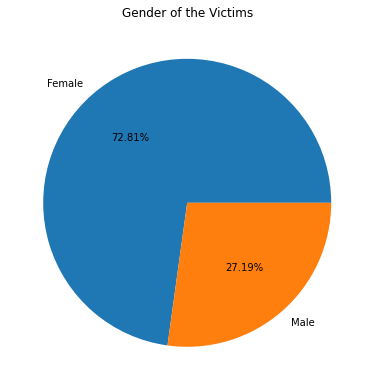

In [6]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
counts = dict(data['gender'].value_counts())
ax.pie(counts.values(), labels = counts.keys(),autopct='%1.2f%%')
plt.title('Gender of the Victims')
plt.show()

From the above figure we can see that 72.81% of the victims were female. 

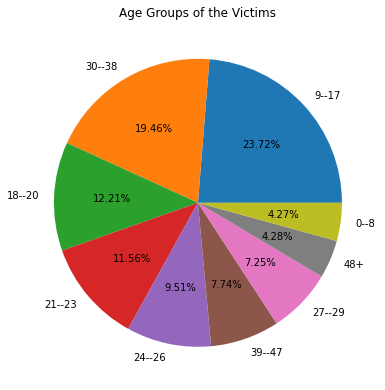

In [7]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
age_counts = dict(data['ageBroad'].value_counts())
ax.pie(age_counts.values(), labels = age_counts.keys(),autopct='%1.2f%%')
plt.title('Age Groups of the Victims')
plt.show()

In [8]:
agegroup = data['ageBroad'].value_counts(normalize=True)
agegroup['9--17'] + agegroup['18--20'] + agegroup['21--23'] + agegroup['24--26'] + agegroup['27--29'] + agegroup['30--38']  

0.8370701720683882

We can see that of all the responses in the age group columns 83% of the victims are between the ages of 9 and 38. 


In [10]:
fig = px.sunburst(data[data['majorityStatus'].notna()], path=['gender', 'majorityStatus', 'ageBroad'], color='majorityStatus',
                  title='Gender, Age and Majority Status Trafficking Victims')
fig.update_layout(width=600, height=600)
fig.show()

Now, let us move on the find out more about the citizenship status of the victims. Note that, since the country of origin colums contains country codes rather than names we will be using an external library [pyconvert](https://pypi.org/project/pycountry-convert/) to map them to country names. 

In [11]:
def get_alpha3(col):
    try:
        iso_3 =  country_name_to_country_alpha3(col)
    except:
        iso_3 = 'Unknown'
    return iso_3

def get_name(col):
    try:
        name =  country_alpha2_to_country_name(col)
    except:
        name = 'Unknown'
    return name

In [12]:
data['country'] = data['citizenship'].apply(lambda x: get_name(x))
data['alpha_3'] = data['country'].apply(lambda x: get_alpha3(x))

In [13]:
data['country']

0        Colombia
1        Colombia
2        Colombia
3        Colombia
4        Colombia
           ...   
48796      Uganda
48797      Uganda
48798      Uganda
48799      Uganda
48800      Uganda
Name: country, Length: 48801, dtype: object

Now we have country names ! Let's visualize this now. 

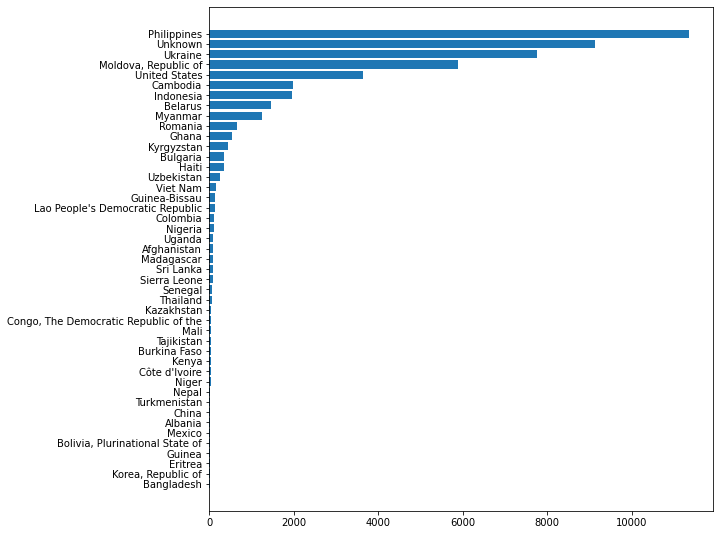

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([0,0,1,1])
citi = dict(data['country'].value_counts())
ax.barh(list(citi.keys()), citi.values())
ax.invert_yaxis()
plt.show()

In [15]:
print('Number of victims with unknown citizenship is {:.2f}%'.format((np.sum(data['country'] == 'Unknown')/data.shape[0])*100))

Number of victims with unknown citizenship is 18.72%


For the rest of victims we can analyse the percentage distribution of citizenship. 

In [16]:
data['country'].value_counts(normalize=True).drop(['Unknown']).nlargest(10)

Philippines             0.232885
Ukraine                 0.159034
Moldova, Republic of    0.120920
United States           0.074507
Cambodia                0.040552
Indonesia               0.040389
Belarus                 0.029979
Myanmar                 0.025614
Romania                 0.013422
Ghana                   0.011147
Name: country, dtype: float64

Creating our final demographic profile based on the findings above we get the following. 

## Demographic Profile 

1. Around 72% of the victims were female. 
2. The number of female victims across all age groups seems to be higher than the number of male victims. 
3. The two most common age groups of the victims were 9-17 (23.72%) and 30-38 (19.46%). Also, 83% of the victims are between the ages of 9 and 38. 
4. More number of victims identified as 'adults' in their respective gender categories. 
5. More than 50% of the victims in the data have citizenship in the Phillipines, Ukraine and Republic of Moldova and the United States followed by Cambodia and Indonesia. 18% have unknown citizenship status.

Now, we can take the liberty to roughly sketch out a profile for a potential trafficking victim. From the dataset, the most popular profile of a victim would be a female between the age of 9 and 38. Since the number of victims with unknown citizenship is pretty high, we could consider all of the top 5 and unknown as options. 

Note: All the columns used in the analysis above have less than 50% missing data. Hence we can make a rough estimate.   

## Part 2 : How are these victims being trafficked ? 

To answer this question, we can have a look at the columns 'isAbduction'. First let us identify the number of missing values in these columns. 

In [17]:
np.sum(data['isAbduction'].isnull())/data.shape[0]

0.6645355627958444

In [18]:
np.sum(data['CountryOfExploitation'].isnull())/data.shape[0]

0.20849982582324134

Even though 66% of values in the abduction column are missing, let us visualize it and see if we can find something interesting. 

In [21]:
data['isAbduction'].value_counts()

0.0    16332
1.0       39
Name: isAbduction, dtype: int64

Assuming 0.0 to be a 'No' and 1.0 to be a 'Yes', 99% of the responders (aka approx 33% out of the 48.8k victims) say that they were not abducted. Although not conclusive this is interesting !

## Part 3 :  Who are the enablers for these trafficking victims ?

In this section, we are trying to identify the enablers or "recruiters" for these trafficking victims. These are usually the people who identify and recruit prospects for trafficking. For this, we turn our attention to the recruiter relationship columns. Let us again identify the percentage of missing values in these columns.  

In [22]:
colm_recruit = ['RecruiterRelationship','recruiterRelationIntimatePartner','recruiterRelationFriend', 
                'recruiterRelationFamily','recruiterRelationOther', 'recruiterRelationUnknown']
colm_feat = ['recruiterRelationFriend', 'recruiterRelationFamily','recruiterRelationOther', 'recruiterRelationUnknown']

In [23]:
np.sum(data[colm_recruit].isnull())/data.shape[0]

RecruiterRelationship               0.628696
recruiterRelationIntimatePartner    0.180468
recruiterRelationFriend             0.180468
recruiterRelationFamily             0.180468
recruiterRelationOther              0.180468
recruiterRelationUnknown            0.001578
dtype: float64

In [24]:
data_female = data[(data.RecruiterRelationship.notna()) & (data.gender == 'Female')].RecruiterRelationship.apply(lambda x: pd.value_counts(str(x).split("; "))).sum(axis = 0)
data_male = data[(data.RecruiterRelationship.notna()) & (data.gender == 'Male')].RecruiterRelationship.apply(lambda x: pd.value_counts(str(x).split("; "))).sum(axis = 0)

In [58]:
colors = {'A':'steelblue',
          'B':'firebrick'}
fig = go.Figure(data=[
    go.Bar(name='Female', x=data_female.index, y=data_female),
    go.Bar(name='Male', x=data_male.index, y=data_male)
])
fig.update_traces(texttemplate='%{value}', textposition='outside')
fig.update_layout(title_text='Recruiter Relationship')
fig.show()

This is interesting. The recruiter columns which had yes/no responses have many responders. This bar graph indicates strongly a large number of responders had a recruiter whose relation was unknown to them. 

## Part 4 : What happens to the victims once they are trafficked ? 

In order to answer this question, we will first analysis the 'countryofExploitation' column followed by the columns indicating the type of labour and other practices the victims are forced into doing, once they are in the trade. 

In [27]:
colm_traff = ['isForcedLabour', 'isSexualExploit', 'isOtherExploit', 'isSexAndLabour',
              'isForcedMarriage', 'isForcedMilitary', 'isOrganRemoval',
              'isSlaveryAndPractices', 'typeOfExploitConcatenated',
               'typeOfLabourAgriculture', 'typeOfLabourAquafarming',
               'typeOfLabourBegging', 'typeOfLabourConstruction',
               'typeOfLabourDomesticWork', 'typeOfLabourHospitality',
               'typeOfLabourIllicitActivities', 'typeOfLabourManufacturing',
               'typeOfLabourMiningOrDrilling', 'typeOfLabourPeddling',
               'typeOfLabourTransportation', 'typeOfLabourOther',
               'typeOfLabourNotSpecified', 'typeOfLabourConcatenated',
               'typeOfSexProstitution', 'typeOfSexPornography',
               'typeOfSexRemoteInteractiveServices', 'typeOfSexPrivateSexualServices',
               'typeOfSexConcatenated', 'CountryOfExploitation']

In [28]:
np.sum(data[colm_traff].isnull())/data.shape[0]

isForcedLabour                        0.465134
isSexualExploit                       0.511055
isOtherExploit                        0.366038
isSexAndLabour                        0.519354
isForcedMarriage                      0.774062
isForcedMilitary                      0.765374
isOrganRemoval                        0.765374
isSlaveryAndPractices                 0.967460
typeOfExploitConcatenated             0.331428
typeOfLabourAgriculture               0.580500
typeOfLabourAquafarming               0.581300
typeOfLabourBegging                   0.581566
typeOfLabourConstruction              0.573779
typeOfLabourDomesticWork              0.537899
typeOfLabourHospitality               0.555726
typeOfLabourIllicitActivities         0.583164
typeOfLabourManufacturing             0.579005
typeOfLabourMiningOrDrilling          0.581566
typeOfLabourPeddling                  0.583164
typeOfLabourTransportation            0.581566
typeOfLabourOther                     0.555665
typeOfLabourN

Oops. The columns seem to be missing a lot of data, so we will visualize it first and see if it makes any sense. 

In [29]:
data['countryexp'] = data['CountryOfExploitation'].apply(lambda x: get_name(x))
data['alpha_3'] = data['countryexp'].apply(lambda x: get_alpha3(x))

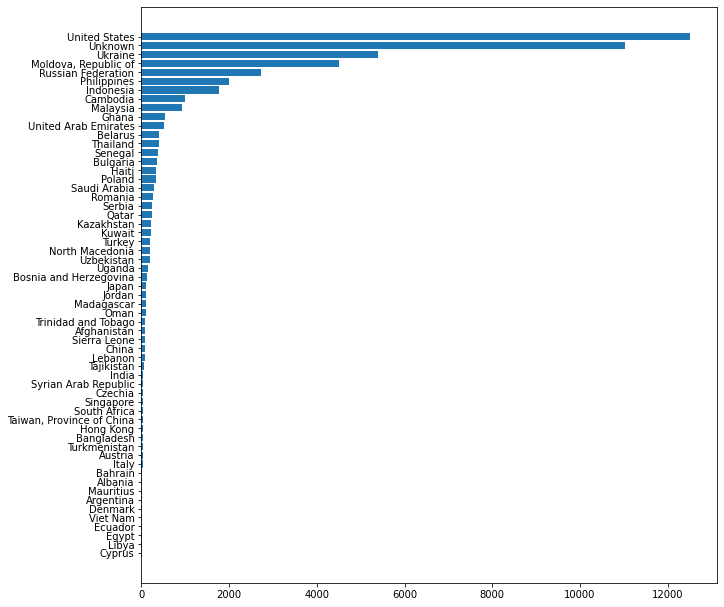

In [30]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0,0,1,1])
citi = dict(data['countryexp'].value_counts())
ax.barh(list(citi.keys()), citi.values())
ax.invert_yaxis()
plt.show()

In [31]:
print('Number of victims with unknown country of exploitation is {:.2f}%'.format((np.sum(data['countryexp'] == 'Unknown')/data.shape[0])*100))

Number of victims with unknown country of exploitation is 22.58%


In [32]:
data['countryexp'].value_counts(normalize=True).drop(['Unknown']).nlargest(10)

United States           0.256388
Ukraine                 0.110633
Moldova, Republic of    0.092293
Russian Federation      0.056105
Philippines             0.040737
Indonesia               0.036413
Cambodia                0.020491
Malaysia                0.019057
Ghana                   0.011147
United Arab Emirates    0.010328
Name: countryexp, dtype: float64

More than 50% of the responders were exploited in one of the top five countries of exploitation mentioned above. 

Now let us visualize the types of exploitation and labour. 

In [40]:
data_female = data[(data.typeOfExploitConcatenated.notna()) & (data.gender == 'Female')].typeOfExploitConcatenated.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0)
data_male = data[(data.typeOfExploitConcatenated.notna()) & (data.gender == 'Male')].typeOfExploitConcatenated.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0)

In [42]:
fig = go.Figure(data=[
    go.Bar(name='Female', x=data_female.index, y=data_female),
    go.Bar(name='Male', x=data_male.index, y=data_male)
])
fig.update_traces(texttemplate='%{value}', textposition='outside')
fig.update_layout(title_text='Type Of Exploit')
fig.show()

In [47]:
data_female = data[(data.typeOfLabourConcatenated.notna()) & (data.gender == 'Female')].typeOfLabourConcatenated.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0)
data_male = data[(data.typeOfLabourConcatenated.notna()) & (data.gender == 'Male')].typeOfLabourConcatenated.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0)

In [49]:
fig = go.Figure(data=[
    go.Bar(name='Female', x=data_female.index, y=data_female),
    go.Bar(name='Male', x=data_male.index, y=data_male)
])
fig.update_traces(texttemplate='%{value}', textposition='outside')
fig.update_layout(title_text='Type Of Labour')
fig.show()

## Part 5 : How are the victims forced to take part/stay in the trade ? 

To answer this question, let us take a look at the columns indicating the various means of control that was used to subdue the victims and force them into complying with the recruiters. 

In [27]:
colm_control = ['meansOfControlDebtBondage','meansOfControlTakesEarnings', 
                'meansOfControlRestrictsFinancialAccess','meansOfControlThreats', 
                'meansOfControlPsychologicalAbuse','meansOfControlPhysicalAbuse', 
                'meansOfControlSexualAbuse','meansOfControlFalsePromises', 
                'meansOfControlPsychoactiveSubstances','meansOfControlRestrictsMovement', 
                'meansOfControlRestrictsMedicalCare','meansOfControlExcessiveWorkingHours', 
                'meansOfControlUsesChildren','meansOfControlThreatOfLawEnforcement',
                'meansOfControlWithholdsNecessities','meansOfControlWithholdsDocuments', 
                'meansOfControlOther','meansOfControlConcatenated']

In [28]:
np.sum(data[colm_control].isnull())/data.shape[0]

meansOfControlDebtBondage                 0.948854
meansOfControlTakesEarnings               0.918096
meansOfControlRestrictsFinancialAccess    0.994816
meansOfControlThreats                     0.894182
meansOfControlPsychologicalAbuse          0.875904
meansOfControlPhysicalAbuse               0.900637
meansOfControlSexualAbuse                 0.942194
meansOfControlFalsePromises               0.921313
meansOfControlPsychoactiveSubstances      0.928096
meansOfControlRestrictsMovement           0.884838
meansOfControlRestrictsMedicalCare        0.948792
meansOfControlExcessiveWorkingHours       0.932030
meansOfControlUsesChildren                0.996906
meansOfControlThreatOfLawEnforcement      0.958853
meansOfControlWithholdsNecessities        0.947050
meansOfControlWithholdsDocuments          0.932911
meansOfControlOther                       0.936477
meansOfControlConcatenated                0.661482
dtype: float64

In [50]:
data_female = data[(data.meansOfControlConcatenated.notna()) & (data.gender == 'Female')].meansOfControlConcatenated.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0)
data_male = data[(data.meansOfControlConcatenated.notna()) & (data.gender == 'Male')].meansOfControlConcatenated.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0)

In [52]:
fig = go.Figure(data=[
    go.Bar(name='Female', x=data_female.index, y=data_female),
    go.Bar(name='Male', x=data_male.index, y=data_male)
])
fig.update_traces(texttemplate='%{value}', textposition='outside')
fig.update_layout(title_text='Means Of Control')
fig.show()

Given that we are dropping rows with all NaN, there are several rows here where one or more columns, this data is insufficient to make a conclusion.